In [4]:
from RutishauserLabtoNWB import helper, single_neuron
from pynwb import NWBHDF5IO
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import clusterdata as cd
import phate
import scipy
import sklearn

# Creating the Data Matrix and Predictions

In [1]:
def make_firing_matrix(neurons):
    num_categories = 5
    mat = np.empty((len(neurons), 2*num_categories))
    stat_type = np.empty(len(neurons))  # 0: none, 1: vs, 2: ms, 3: vs and ms
    for i in range(len(neurons)):
        trial_type = [neurons[i].trials_learn, neurons[i].trials_recog]
        for j in range(2):
            for k in range(num_categories):
                spike_rate_sum = 0
                for trial in trial_type[j][(k*20):((k+1)*20)]:
                    spike_rate_sum += (trial.win_spike_rate(neurons[i].spike_timestamps, 1000, 2000)
                                       -trial.win_spike_rate(neurons[i].spike_timestamps, 0, 1000)) # rel baseline
                mat[i, 5*j+k] = spike_rate_sum
        neuron_type = 0
        if neurons[i].vs_test() < 0.05:
            neuron_type += 1
        if neurons[i].ms_test(1000) < 0.05:
            neuron_type += 2
        stat_type[i] = neuron_type
    return mat, stat_type

In [2]:
# this pulls the time courses (similar to the PSTH at the v bottom of this notebook)
def make_timecourse_matrix(neurons):
    num_categories = 5; x_range = 2500; bin_size = 250; n_x = int(x_range/bin_size)
    mat = np.empty((len(neurons), 2*num_categories, n_x))
    stat_type = np.empty(len(neurons))  # 0: none, 1: vs, 2: ms, 3: vs and ms
    for i in range(len(neurons)): # each neuron
        trial_type = [neurons[i].trials_learn, neurons[i].trials_recog]
        for j in range(2): # learn or recog
            for k in range(num_categories): # type of stim
                spike_rate = np.zeros(n_x)
                for m in range(n_x): # time bin
                    mean_rate = 0; start = m*bin_size; end = (m+1)*bin_size;
                    for trial in trial_type[j][(k*20):((k+1)*20)]:
                        mean_rate += trial.win_spike_rate(neurons[i].spike_timestamps, start-1000, end-1000)
                    spike_rate[m] = mean_rate / 20
                mat[i, 5*j+k,:] = spike_rate
        neuron_type = 0
        if neurons[i].vs_test() < 0.05:
            neuron_type += 1
        if neurons[i].ms_test(1000) < 0.05:
            neuron_type += 2
        stat_type[i] = neuron_type
    return mat

In [5]:
timecourses = None
data_matrix = None
predictions = None

for filename in os.listdir('NWBData'):
    file = NWBHDF5IO('NWBData/{}'.format(filename), mode='r').read()
    neurons = single_neuron.extract_neuron_data_from_nwb(file)
    if timecourses is None:
        data_matrix, predictions = make_firing_matrix(neurons)
        timecourses = make_timecourse_matrix(neurons) # again not sure if this will work
    else:
        mat, pred = make_firing_matrix(neurons)
        data_matrix = np.append(data_matrix, mat, axis=0)
        predictions = np.append(predictions, pred, axis=0)
        timecourses = np.append(timecourses, make_timecourse_matrix(neurons), axis=0)
    if timecourses.shape[0] >= 2000:
        break

Session_id:  H10_7
Channel:  1
Cell_id:  0
Number of spikes: 1809
Session_id:  H10_7
Channel:  2
Cell_id:  1
Number of spikes: 2057
Session_id:  H10_7
Channel:  2
Cell_id:  1
Number of spikes: 4298
Session_id:  H10_7
Channel:  3
Cell_id:  2
Number of spikes: 1188
Session_id:  H10_7
Channel:  3
Cell_id:  2
Number of spikes: 8091
Session_id:  H10_7
Channel:  4
Cell_id:  3
Number of spikes: 2107
Session_id:  H10_7
Channel:  4
Cell_id:  3
Number of spikes: 1009
Session_id:  H10_7
Channel:  4
Cell_id:  3
Number of spikes: 1869
Session_id:  H10_7
Channel:  5
Cell_id:  4
Number of spikes: 684
Session_id:  H10_7
Channel:  5
Cell_id:  4
Number of spikes: 2176
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 194
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 460
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 1719
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 1230
Session_id:  H10_7
Channel:  8
Cell_id:  6
Number of spikes: 1935
Session_id:  

Session_id:  H14_18
Channel:  1
Cell_id:  0
Number of spikes: 1467
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 561
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 908
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 3161
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 5061
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 873
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 782
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 2474
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 2024
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 2789
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 953
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 490
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 2779
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 411
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 221
Ses

Session_id:  H16_24
Channel:  10
Cell_id:  0
Number of spikes: 5478
Session_id:  H16_24
Channel:  10
Cell_id:  0
Number of spikes: 4886
Session_id:  H16_24
Channel:  11
Cell_id:  1
Number of spikes: 380
Session_id:  H16_24
Channel:  11
Cell_id:  1
Number of spikes: 5110
Session_id:  H16_24
Channel:  13
Cell_id:  2
Number of spikes: 3990
Session_id:  H16_24
Channel:  14
Cell_id:  3
Number of spikes: 8506
Session_id:  H16_24
Channel:  19
Cell_id:  4
Number of spikes: 7030
Session_id:  H16_24
Channel:  22
Cell_id:  5
Number of spikes: 2465
Session_id:  H16_24
Channel:  23
Cell_id:  6
Number of spikes: 2835
Session_id:  H16_24
Channel:  25
Cell_id:  7
Number of spikes: 21553
Session_id:  H16_24
Channel:  26
Cell_id:  8
Number of spikes: 2295
Session_id:  H16_24
Channel:  27
Cell_id:  9
Number of spikes: 6038
Session_id:  H16_24
Channel:  30
Cell_id:  10
Number of spikes: 25820
Session_id:  H16_24
Channel:  31
Cell_id:  11
Number of spikes: 22906
Session_id:  H16_24
Channel:  42
Cell_id:  1

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


Session_id:  H19_27
Channel:  15
Cell_id:  0
Number of spikes: 465
Session_id:  H19_27
Channel:  15
Cell_id:  0
Number of spikes: 914
Session_id:  H19_27
Channel:  15
Cell_id:  0
Number of spikes: 6797
Session_id:  H19_27
Channel:  26
Cell_id:  1
Number of spikes: 776
Session_id:  H19_27
Channel:  26
Cell_id:  1
Number of spikes: 5011
Session_id:  H19_27
Channel:  26
Cell_id:  1
Number of spikes: 778
Session_id:  H19_27
Channel:  28
Cell_id:  2
Number of spikes: 1224
Session_id:  H19_27
Channel:  28
Cell_id:  2
Number of spikes: 576
Session_id:  H19_27
Channel:  28
Cell_id:  2
Number of spikes: 994
Session_id:  H19_27
Channel:  29
Cell_id:  3
Number of spikes: 82
Session_id:  H19_27
Channel:  29
Cell_id:  3
Number of spikes: 1535
Session_id:  H19_27
Channel:  29
Cell_id:  3
Number of spikes: 692
Session_id:  H19_27
Channel:  30
Cell_id:  4
Number of spikes: 2308
Session_id:  H19_27
Channel:  31
Cell_id:  5
Number of spikes: 647
Session_id:  H19_27
Channel:  31
Cell_id:  5
Number of spi

Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 4146
Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 1697
Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 268
Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 10489
Session_id:  H23_43
Channel:  3
Cell_id:  1
Number of spikes: 8907
Session_id:  H23_43
Channel:  3
Cell_id:  1
Number of spikes: 9605
Session_id:  H23_43
Channel:  4
Cell_id:  2
Number of spikes: 417
Session_id:  H23_43
Channel:  4
Cell_id:  2
Number of spikes: 5927
Session_id:  H23_43
Channel:  4
Cell_id:  2
Number of spikes: 3353
Session_id:  H23_43
Channel:  5
Cell_id:  3
Number of spikes: 375
Session_id:  H23_43
Channel:  5
Cell_id:  3
Number of spikes: 1350
Session_id:  H23_43
Channel:  5
Cell_id:  3
Number of spikes: 9273
Session_id:  H23_43
Channel:  6
Cell_id:  4
Number of spikes: 332
Session_id:  H23_43
Channel:  6
Cell_id:  4
Number of spikes: 478
Session_id:  H23_43
Channel:  6
Cell_id:  4
Number of spikes: 5389

Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 1205
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 353
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 174
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 332
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 186
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 240
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 262
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 182
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 559
Session_id:  CS24_60
Channel:  14
Cell_id:  2
Number of spikes: 281
Session_id:  CS24_60
Channel:  14
Cell_id:  2
Number of spikes: 357
Session_id:  CS24_60
Channel:  14
Cell_id:  2
Number of spikes: 493
Session_id:  CS24_60
Channel:  16
Cell_id:  3
Number of spikes: 696
Session_id:  CS24_60
Channel:  16
Cell_id:  3
Number of spikes: 166
Session_id:  CS24_60
Channel:  16
Cell_id:  3
Number

Session_id:  CS26_66
Channel:  49
Cell_id:  0
Number of spikes: 441
Session_id:  CS26_66
Channel:  51
Cell_id:  1
Number of spikes: 1534
Session_id:  CS26_66
Channel:  51
Cell_id:  1
Number of spikes: 1176
Session_id:  CS26_66
Channel:  52
Cell_id:  2
Number of spikes: 930
Session_id:  CS26_66
Channel:  52
Cell_id:  2
Number of spikes: 256
Session_id:  CS26_66
Channel:  52
Cell_id:  2
Number of spikes: 54
Session_id:  CS26_66
Channel:  53
Cell_id:  3
Number of spikes: 725
Session_id:  CS26_66
Channel:  53
Cell_id:  3
Number of spikes: 209
Session_id:  CS26_66
Channel:  55
Cell_id:  4
Number of spikes: 485
Session_id:  CS26_66
Channel:  55
Cell_id:  4
Number of spikes: 2275
Session_id:  CS26_66
Channel:  56
Cell_id:  5
Number of spikes: 298
Session_id:  CS27_67
Channel:  1
Cell_id:  0
Number of spikes: 1607
Session_id:  CS27_67
Channel:  1
Cell_id:  0
Number of spikes: 1752
Session_id:  CS27_67
Channel:  1
Cell_id:  0
Number of spikes: 1140
Session_id:  CS27_67
Channel:  2
Cell_id:  1
N

Session_id:  H28_48
Channel:  1
Cell_id:  0
Number of spikes: 12433
Session_id:  H28_48
Channel:  2
Cell_id:  1
Number of spikes: 1362
Session_id:  H28_48
Channel:  2
Cell_id:  1
Number of spikes: 8034
Session_id:  H28_48
Channel:  3
Cell_id:  2
Number of spikes: 1166
Session_id:  H28_48
Channel:  3
Cell_id:  2
Number of spikes: 2379
Session_id:  H28_48
Channel:  5
Cell_id:  3
Number of spikes: 3990
Session_id:  H28_48
Channel:  6
Cell_id:  4
Number of spikes: 8742
Session_id:  H28_48
Channel:  7
Cell_id:  5
Number of spikes: 8203
Session_id:  H28_48
Channel:  25
Cell_id:  6
Number of spikes: 91
Session_id:  H28_48
Channel:  25
Cell_id:  6
Number of spikes: 889
Session_id:  H28_48
Channel:  25
Cell_id:  6
Number of spikes: 2590
Session_id:  H28_48
Channel:  26
Cell_id:  7
Number of spikes: 827
Session_id:  H28_48
Channel:  26
Cell_id:  7
Number of spikes: 2917
Session_id:  H28_48
Channel:  26
Cell_id:  7
Number of spikes: 9367
Session_id:  H28_48
Channel:  27
Cell_id:  8
Number of spik

Session_id:  CS29_69
Channel:  45
Cell_id:  13
Number of spikes: 13816
Session_id:  CS29_69
Channel:  46
Cell_id:  14
Number of spikes: 1717
Session_id:  CS29_69
Channel:  46
Cell_id:  14
Number of spikes: 6562
Session_id:  CS29_69
Channel:  47
Cell_id:  15
Number of spikes: 436
Session_id:  CS29_69
Channel:  47
Cell_id:  15
Number of spikes: 156
Session_id:  CS29_69
Channel:  47
Cell_id:  15
Number of spikes: 420
Session_id:  CS29_69
Channel:  47
Cell_id:  15
Number of spikes: 116
Session_id:  CS29_69
Channel:  47
Cell_id:  15
Number of spikes: 990
Session_id:  CS29_69
Channel:  47
Cell_id:  15
Number of spikes: 7974
Session_id:  CS29_69
Channel:  48
Cell_id:  16
Number of spikes: 509
Session_id:  CS29_69
Channel:  48
Cell_id:  16
Number of spikes: 273
Session_id:  CS29_69
Channel:  48
Cell_id:  16
Number of spikes: 9494
Session_id:  CS29_70
Channel:  9
Cell_id:  0
Number of spikes: 1359
Session_id:  CS29_70
Channel:  10
Cell_id:  1
Number of spikes: 591
Session_id:  CS29_70
Channel: 

Session_id:  CS31_73
Channel:  26
Cell_id:  0
Number of spikes: 2063
Session_id:  CS31_73
Channel:  26
Cell_id:  0
Number of spikes: 185
Session_id:  CS31_73
Channel:  35
Cell_id:  1
Number of spikes: 160
Session_id:  CS31_73
Channel:  35
Cell_id:  1
Number of spikes: 316
Session_id:  H31_50
Channel:  25
Cell_id:  0
Number of spikes: 4021
Session_id:  H31_50
Channel:  26
Cell_id:  1
Number of spikes: 2356
Session_id:  H31_50
Channel:  26
Cell_id:  1
Number of spikes: 15097
Session_id:  H31_50
Channel:  26
Cell_id:  1
Number of spikes: 525
Session_id:  H31_50
Channel:  27
Cell_id:  2
Number of spikes: 846
Session_id:  H31_50
Channel:  27
Cell_id:  2
Number of spikes: 6035
Session_id:  H31_50
Channel:  28
Cell_id:  3
Number of spikes: 1738
Session_id:  H31_50
Channel:  28
Cell_id:  3
Number of spikes: 6804
Session_id:  H31_50
Channel:  29
Cell_id:  4
Number of spikes: 9496
Session_id:  H31_50
Channel:  30
Cell_id:  5
Number of spikes: 2016
Session_id:  H31_50
Channel:  30
Cell_id:  5
Num

Session_id:  CS33_76
Channel:  56
Cell_id:  13
Number of spikes: 858
Session_id:  CS33_76
Channel:  56
Cell_id:  13
Number of spikes: 11109
Session_id:  CS33_77
Channel:  20
Cell_id:  0
Number of spikes: 264
Session_id:  CS33_77
Channel:  20
Cell_id:  0
Number of spikes: 218
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 1827
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 3240
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 253
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 2633
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 397
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 114
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 943
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 7606
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 2019
Session_id:  CS33_77
Channel:  36
Cell_id:  3
Number of spikes: 516
Session_id:  CS33_77
Channel:  36
Cell_

Session_id:  CS38_102
Channel:  3
Cell_id:  0
Number of spikes: 1805
Session_id:  CS38_102
Channel:  9
Cell_id:  1
Number of spikes: 734
Session_id:  CS38_102
Channel:  9
Cell_id:  1
Number of spikes: 4431
Session_id:  CS38_102
Channel:  9
Cell_id:  1
Number of spikes: 7303
Session_id:  CS38_102
Channel:  33
Cell_id:  2
Number of spikes: 2909
Session_id:  CS38_102
Channel:  33
Cell_id:  2
Number of spikes: 4228
Session_id:  CS38_102
Channel:  34
Cell_id:  3
Number of spikes: 5656
Session_id:  CS38_102
Channel:  35
Cell_id:  4
Number of spikes: 872
Session_id:  CS38_102
Channel:  35
Cell_id:  4
Number of spikes: 3281
Session_id:  CS38_102
Channel:  35
Cell_id:  4
Number of spikes: 661
Session_id:  CS38_102
Channel:  36
Cell_id:  5
Number of spikes: 1813
Session_id:  CS38_102
Channel:  37
Cell_id:  6
Number of spikes: 2340
Session_id:  CS38_102
Channel:  37
Cell_id:  6
Number of spikes: 2861
Session_id:  CS38_102
Channel:  38
Cell_id:  7
Number of spikes: 2609
Session_id:  CS38_102
Chann

Session_id:  CS39_93
Channel:  26
Cell_id:  0
Number of spikes: 583
Session_id:  CS39_93
Channel:  26
Cell_id:  0
Number of spikes: 873
Session_id:  CS39_93
Channel:  27
Cell_id:  1
Number of spikes: 2536
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 202
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 395
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 2188
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 558
Session_id:  CS39_93
Channel:  32
Cell_id:  3
Number of spikes: 2170
Session_id:  CS39_93
Channel:  32
Cell_id:  3
Number of spikes: 703
Session_id:  CS39_93
Channel:  32
Cell_id:  3
Number of spikes: 612
Session_id:  CS39_93
Channel:  49
Cell_id:  4
Number of spikes: 1209
Session_id:  CS39_93
Channel:  50
Cell_id:  5
Number of spikes: 10096
Session_id:  CS39_93
Channel:  51
Cell_id:  6
Number of spikes: 4654
Session_id:  CS39_93
Channel:  51
Cell_id:  6
Number of spikes: 1145
Session_id:  CS39_93
Channel:  51
Cell_i

Session_id:  H42_54
Channel:  10
Cell_id:  0
Number of spikes: 620
Session_id:  H42_54
Channel:  10
Cell_id:  0
Number of spikes: 2672
Session_id:  H42_54
Channel:  10
Cell_id:  0
Number of spikes: 1031
Session_id:  H42_54
Channel:  15
Cell_id:  1
Number of spikes: 2963
Session_id:  H42_54
Channel:  17
Cell_id:  2
Number of spikes: 228
Session_id:  H42_54
Channel:  17
Cell_id:  2
Number of spikes: 355
Session_id:  H42_54
Channel:  17
Cell_id:  2
Number of spikes: 5527
Session_id:  H42_54
Channel:  18
Cell_id:  3
Number of spikes: 18577
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 94
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 456
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 182
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 621
Session_id:  H42_54
Channel:  21
Cell_id:  5
Number of spikes: 11183
Session_id:  H42_54
Channel:  26
Cell_id:  6
Number of spikes: 1101
Session_id:  H42_54
Channel:  30
Cell_id:  7
Number of

Session_id:  H43_56
Channel:  9
Cell_id:  0
Number of spikes: 185
Session_id:  H43_56
Channel:  10
Cell_id:  1
Number of spikes: 1048
Session_id:  H43_56
Channel:  10
Cell_id:  1
Number of spikes: 903
Session_id:  H43_56
Channel:  10
Cell_id:  1
Number of spikes: 132
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 1111
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 1110
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 462
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 783
Session_id:  H43_56
Channel:  13
Cell_id:  3
Number of spikes: 493
Session_id:  H43_56
Channel:  14
Cell_id:  4
Number of spikes: 1853
Session_id:  H43_56
Channel:  14
Cell_id:  4
Number of spikes: 1819
Session_id:  H43_56
Channel:  14
Cell_id:  4
Number of spikes: 927
Session_id:  H43_56
Channel:  15
Cell_id:  5
Number of spikes: 152
Session_id:  H43_56
Channel:  15
Cell_id:  5
Number of spikes: 558
Session_id:  H43_56
Channel:  15
Cell_id:  5
Number of spi

Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 429
Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 1007
Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 544
Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 800
Session_id:  H47_92
Channel:  15
Cell_id:  1
Number of spikes: 3779
Session_id:  H47_92
Channel:  18
Cell_id:  2
Number of spikes: 507
Session_id:  H47_92
Channel:  18
Cell_id:  2
Number of spikes: 1174
Session_id:  H47_97
Channel:  3
Cell_id:  0
Number of spikes: 3216
Session_id:  H47_97
Channel:  4
Cell_id:  1
Number of spikes: 1420
Session_id:  H47_97
Channel:  4
Cell_id:  1
Number of spikes: 1189
Session_id:  H47_97
Channel:  5
Cell_id:  2
Number of spikes: 2404
Session_id:  H47_97
Channel:  6
Cell_id:  3
Number of spikes: 6206
Session_id:  H47_97
Channel:  9
Cell_id:  4
Number of spikes: 4057
Session_id:  H47_97
Channel:  9
Cell_id:  4
Number of spikes: 3586
Session_id:  H47_97
Channel:  9
Cell_id:  4
Number of spikes: 1

Session_id:  CS49_117
Channel:  52
Cell_id:  0
Number of spikes: 882
Session_id:  CS49_117
Channel:  54
Cell_id:  1
Number of spikes: 131
Session_id:  CS49_117
Channel:  57
Cell_id:  2
Number of spikes: 1869
Session_id:  CS49_117
Channel:  58
Cell_id:  3
Number of spikes: 1438
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 109
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 903
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 919
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 5375
Session_id:  CS49_117
Channel:  62
Cell_id:  5
Number of spikes: 745
Session_id:  CS49_117
Channel:  64
Cell_id:  6
Number of spikes: 128
Session_id:  CS49_117
Channel:  64
Cell_id:  6
Number of spikes: 2098
Session_id:  CS49_118
Channel:  49
Cell_id:  0
Number of spikes: 373
Session_id:  CS49_118
Channel:  50
Cell_id:  1
Number of spikes: 370
Session_id:  CS49_118
Channel:  52
Cell_id:  2
Number of spikes: 281
Session_id:  CS49_118
Channel:

Session_id:  H51_105
Channel:  14
Cell_id:  0
Number of spikes: 564
Session_id:  H51_105
Channel:  14
Cell_id:  0
Number of spikes: 1262
Session_id:  H51_105
Channel:  26
Cell_id:  1
Number of spikes: 2138
Session_id:  H51_105
Channel:  27
Cell_id:  2
Number of spikes: 306
Session_id:  H51_105
Channel:  27
Cell_id:  2
Number of spikes: 4134
Session_id:  H51_105
Channel:  28
Cell_id:  3
Number of spikes: 386
Session_id:  H51_105
Channel:  28
Cell_id:  3
Number of spikes: 295
Session_id:  H51_105
Channel:  28
Cell_id:  3
Number of spikes: 1773
Session_id:  H51_105
Channel:  29
Cell_id:  4
Number of spikes: 859
Session_id:  H51_105
Channel:  32
Cell_id:  5
Number of spikes: 3035
Session_id:  H51_105
Channel:  41
Cell_id:  6
Number of spikes: 1077
Session_id:  H51_105
Channel:  41
Cell_id:  6
Number of spikes: 3014
Session_id:  H51_105
Channel:  42
Cell_id:  7
Number of spikes: 1801
Session_id:  H51_105
Channel:  42
Cell_id:  7
Number of spikes: 1314
Session_id:  H51_105
Channel:  42
Cell_

Session_id:  CS54_124
Channel:  17
Cell_id:  0
Number of spikes: 3017
Session_id:  CS54_124
Channel:  17
Cell_id:  0
Number of spikes: 1429
Session_id:  CS54_124
Channel:  17
Cell_id:  0
Number of spikes: 4511
Session_id:  CS54_124
Channel:  18
Cell_id:  1
Number of spikes: 3341
Session_id:  CS54_124
Channel:  18
Cell_id:  1
Number of spikes: 2388
Session_id:  CS54_124
Channel:  19
Cell_id:  2
Number of spikes: 1147
Session_id:  CS54_124
Channel:  19
Cell_id:  2
Number of spikes: 2477
Session_id:  CS54_124
Channel:  20
Cell_id:  3
Number of spikes: 1015
Session_id:  CS54_124
Channel:  20
Cell_id:  3
Number of spikes: 8561
Session_id:  CS54_124
Channel:  20
Cell_id:  3
Number of spikes: 3690
Session_id:  CS54_124
Channel:  22
Cell_id:  4
Number of spikes: 908
Session_id:  CS54_124
Channel:  22
Cell_id:  4
Number of spikes: 2743
Session_id:  CS54_124
Channel:  23
Cell_id:  5
Number of spikes: 1009
Session_id:  CS54_124
Channel:  23
Cell_id:  5
Number of spikes: 2685
Session_id:  CS54_124

Session_id:  CS54_126
Channel:  17
Cell_id:  0
Number of spikes: 827
Session_id:  CS54_126
Channel:  17
Cell_id:  0
Number of spikes: 1203
Session_id:  CS54_126
Channel:  18
Cell_id:  1
Number of spikes: 1777
Session_id:  CS54_126
Channel:  18
Cell_id:  1
Number of spikes: 3048
Session_id:  CS54_126
Channel:  18
Cell_id:  1
Number of spikes: 569
Session_id:  CS54_126
Channel:  19
Cell_id:  2
Number of spikes: 3864
Session_id:  CS54_126
Channel:  19
Cell_id:  2
Number of spikes: 5530
Session_id:  CS54_126
Channel:  19
Cell_id:  2
Number of spikes: 2018
Session_id:  CS54_126
Channel:  20
Cell_id:  3
Number of spikes: 1948
Session_id:  CS54_126
Channel:  20
Cell_id:  3
Number of spikes: 241
Session_id:  CS54_126
Channel:  20
Cell_id:  3
Number of spikes: 4244
Session_id:  CS54_126
Channel:  21
Cell_id:  4
Number of spikes: 522
Session_id:  CS54_126
Channel:  21
Cell_id:  4
Number of spikes: 926
Session_id:  CS54_126
Channel:  21
Cell_id:  4
Number of spikes: 631
Session_id:  CS54_126
Chan

Session_id:  CS58_132
Channel:  146
Cell_id:  0
Number of spikes: 1037
Session_id:  CS58_132
Channel:  148
Cell_id:  1
Number of spikes: 1365
Session_id:  CS58_132
Channel:  149
Cell_id:  2
Number of spikes: 2324
Session_id:  CS58_132
Channel:  150
Cell_id:  3
Number of spikes: 3589
Session_id:  CS58_132
Channel:  177
Cell_id:  4
Number of spikes: 722
Session_id:  CS58_132
Channel:  181
Cell_id:  5
Number of spikes: 5699
Session_id:  CS58_132
Channel:  182
Cell_id:  6
Number of spikes: 937
Session_id:  CS58_132
Channel:  183
Cell_id:  7
Number of spikes: 749
Session_id:  CS58_133
Channel:  150
Cell_id:  0
Number of spikes: 3643
Session_id:  CS58_133
Channel:  151
Cell_id:  1
Number of spikes: 1134
Session_id:  CS60_134
Channel:  177
Cell_id:  0
Number of spikes: 1330
Session_id:  CS60_134
Channel:  178
Cell_id:  1
Number of spikes: 833
Session_id:  CS60_134
Channel:  178
Cell_id:  1
Number of spikes: 711
Session_id:  CS60_134
Channel:  178
Cell_id:  1
Number of spikes: 1619
Session_id:

Session_id:  H09_6
Channel:  2
Cell_id:  0
Number of spikes: 1180
Session_id:  H09_6
Channel:  3
Cell_id:  1
Number of spikes: 880
Session_id:  H09_6
Channel:  4
Cell_id:  2
Number of spikes: 2943
Session_id:  H09_6
Channel:  5
Cell_id:  3
Number of spikes: 2916
Session_id:  H09_6
Channel:  6
Cell_id:  4
Number of spikes: 629
Session_id:  H09_6
Channel:  6
Cell_id:  4
Number of spikes: 1745
Session_id:  H09_6
Channel:  8
Cell_id:  5
Number of spikes: 1066
Session_id:  H09_6
Channel:  8
Cell_id:  5
Number of spikes: 1010
Session_id:  H09_6
Channel:  18
Cell_id:  6
Number of spikes: 1652
Session_id:  H09_6
Channel:  18
Cell_id:  6
Number of spikes: 2017
Session_id:  H09_6
Channel:  19
Cell_id:  7
Number of spikes: 1216
Session_id:  H09_6
Channel:  19
Cell_id:  7
Number of spikes: 1883
Session_id:  H09_6
Channel:  20
Cell_id:  8
Number of spikes: 1642
Session_id:  H09_6
Channel:  21
Cell_id:  9
Number of spikes: 811
Session_id:  H09_6
Channel:  21
Cell_id:  9
Number of spikes: 2157
Sessio

Session_id:  T100_2008
Channel:  208
Cell_id:  0
Number of spikes: 1514
Session_id:  T101_2011
Channel:  131
Cell_id:  0
Number of spikes: 1425
Session_id:  T101_2011
Channel:  132
Cell_id:  1
Number of spikes: 1098
Session_id:  T101_2011
Channel:  133
Cell_id:  2
Number of spikes: 1687
Session_id:  T101_2011
Channel:  134
Cell_id:  3
Number of spikes: 3020
Session_id:  T101_2011
Channel:  135
Cell_id:  4
Number of spikes: 1622
Session_id:  T101_2011
Channel:  136
Cell_id:  5
Number of spikes: 1002
Session_id:  T101_2011
Channel:  196
Cell_id:  6
Number of spikes: 1512
Session_id:  T101_2011
Channel:  198
Cell_id:  7
Number of spikes: 699
Session_id:  T103_2009
Channel:  137
Cell_id:  0
Number of spikes: 1322
Session_id:  T103_2009
Channel:  140
Cell_id:  1
Number of spikes: 1963
Session_id:  T103_2009
Channel:  140
Cell_id:  1
Number of spikes: 1661
Session_id:  T107_2007
Channel:  155
Cell_id:  0
Number of spikes: 1414
Session_id:  T107_2007
Channel:  157
Cell_id:  1
Number of spikes

In [6]:
print(data_matrix.shape)
print(predictions.shape)
print(timecourses.shape)

(1864, 10)
(1864,)
(1864, 10, 10)


In [8]:
np.savez_compressed('neuron_firing_matrix', data_matrix)
np.savez_compressed('neuron_predicted_labels', predictions)
np.savez_compressed('timecourse_matrix', timecourses)

# Initial Exploration of Dimensionality Reduction Methods

In [1]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import clusterdata as cd
import phate
import scipy
import sklearn

In [2]:
def visualize_by_label(data_matrix, predictions, limits):
    x1, x2, y1, y2 = limits
    fig, ax = plt.subplots(1, 5, figsize=(20,5))
    data_phate = phate.PHATE(verbose=0).fit_transform(data_matrix)
    for i in range(5):
        if i == 0:
            ax[0].scatter(data_phate[:,0],data_phate[:,1],c=predictions)
            ax[0].set_title('All Together')
        else:
            ind = [a for a in range(len(predictions)) if predictions[a]==i-1]
            ax[i].scatter(data_phate[ind,0], data_phate[ind,1])
            ax[i].set_title('Label: {}'.format(i-1))
        ax[i].set_xlim(x1, x2)
        ax[i].set_ylim(y1, y2)
    plt.show()

In [3]:
# load the files
data_matrix = np.load('neuron_firing_matrix.npz')['arr_0']
predictions = np.load('neuron_predicted_labels.npz')['arr_0']
timecourses = np.load('timecourse_matrix.npz')['arr_0']
print(data_matrix.shape)  # should be (1864, 10)
print(predictions.shape)  # should be (1864,)
print(timecourses.shape)  # should be (1864, 10, 10)

(1864, 10)
(1864,)
(1864, 10, 10)


In [38]:
data_matrix

array([[ 12.,  12.,  19., ...,  12.,   9.,   6.],
       [ 11.,   4.,  12., ...,   7.,   6.,   3.],
       [ 81., 157., 122., ..., 137., 131.,  89.],
       ...,
       [  8.,   9.,  34., ...,  30.,  42.,  18.],
       [  7.,  13.,  51., ...,  77.,  80., 101.],
       [ 21.,  14., 178., ..., 330., 289., 315.]])

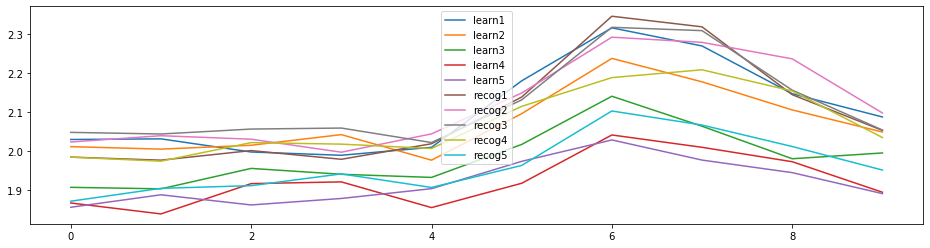

In [5]:
# plotting the mean timecourse for all cells in the 10 categories we have
ft_labels = ['learn1','learn2','learn3','learn4','learn5','recog1','recog2','recog3','recog4','recog5']
plt.figure(figsize=(16,4))
for i in range(10):
    plt.plot(np.mean(timecourses,axis=0)[i,:])
plt.legend(ft_labels)
plt.show()

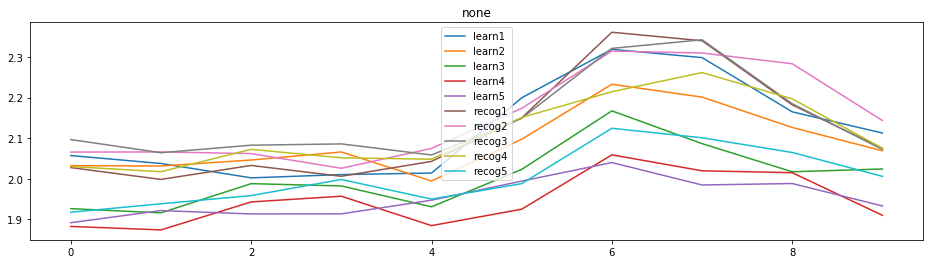

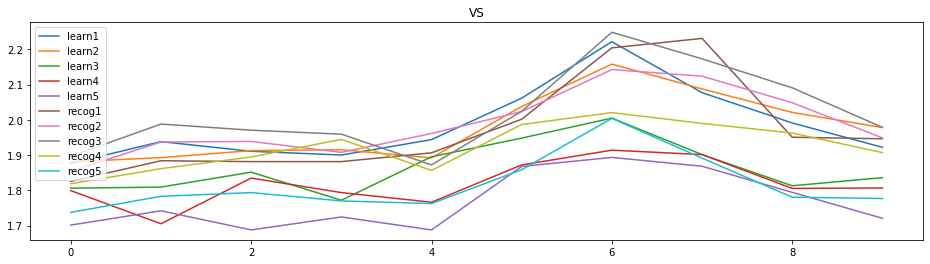

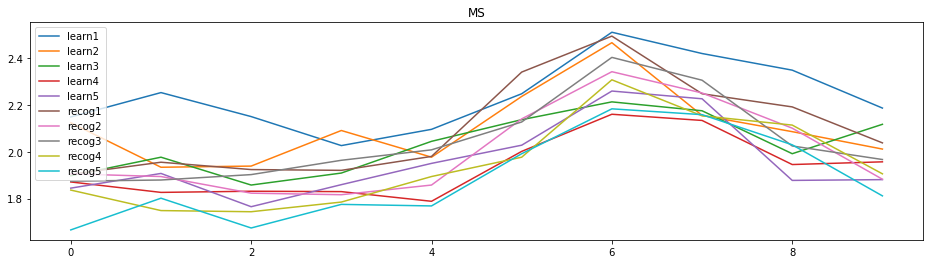

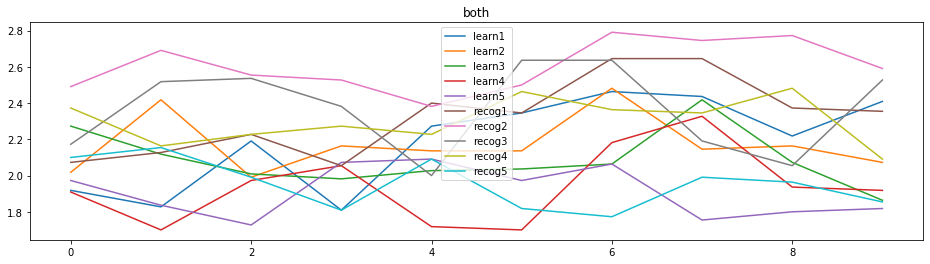

In [6]:
# plotting the mean timecourse for dif cell types in the 10 categories we have
cell_types = ['none','VS','MS','both']
ft_labels = ['learn1','learn2','learn3','learn4','learn5','recog1','recog2','recog3','recog4','recog5']
for j in range(len(cell_types)):
    plt.figure(figsize=(16,4))
    for i in range(10):
        plt.plot(np.mean(timecourses[predictions==j,:,:],axis=0)[i,:]) # collapsing the cells
    plt.legend(ft_labels)
    plt.title(cell_types[j])
    plt.show()

In [46]:
# z-score, PCA, and then PHATE
from sklearn.decomposition import PCA
for i in range(10): # for each timecourse type
    timecourses[:,i,:] /= np.sum(timecourses[:,i,:],axis=0) # z-score each timecourse --> change row-norm
    tc_recon = PCA(n_components=1).fit_transform(tc_z)
    if i==0: 
        frtc_recon = tc_recon
    else:
        frtc_recon = np.append(frtc_recon,tc_recon,axis=1)


In [47]:
tc_z.shape

(1864, 10)

In [48]:
frtc_recon.shape

(1864, 10)

/opt/anaconda3/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 122 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,
/opt/anaconda3/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


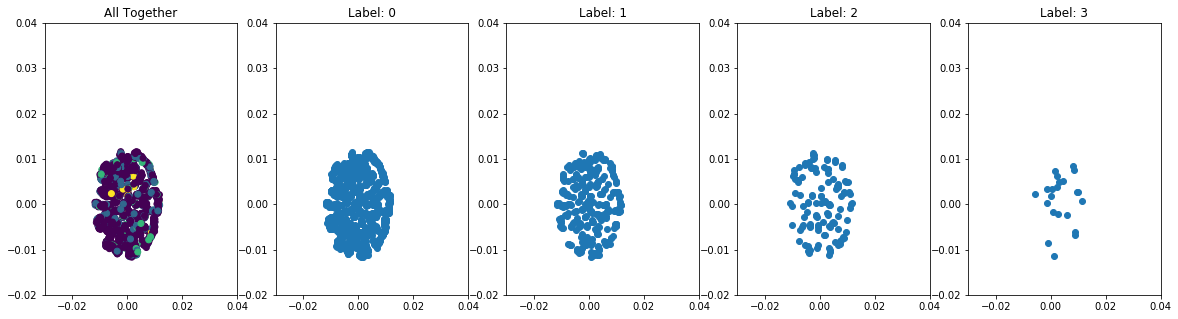

In [49]:
visualize_by_label(frtc_recon, predictions, [-0.15,0.15,-0.15,0.15])

/opt/anaconda3/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 122 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


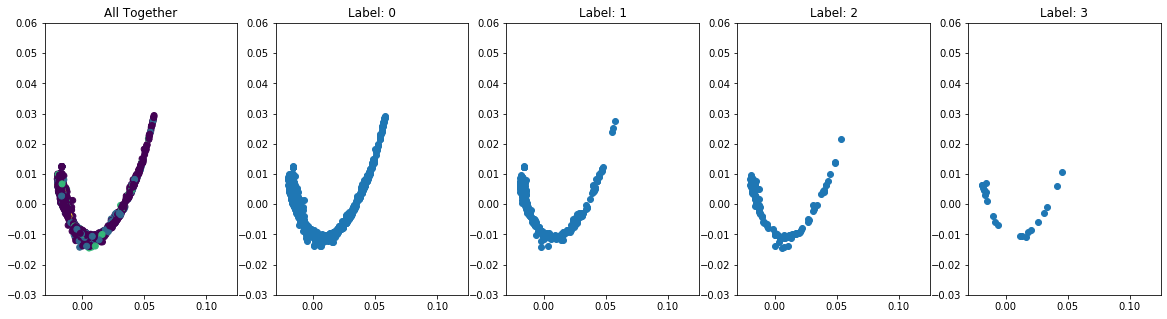

In [52]:
tmp = frtc_recon - np.reshape(np.mean(frtc_recon, axis=1), (frtc_recon.shape[0], 1))
visualize_by_label(tmp, predictions, [-0.03, 0.125, -0.03, 0.06])

In [54]:
tmp = frtc_recon - np.reshape(np.mean(frtc_recon, axis=1), (frtc_recon.shape[0], 1))
data_affin = cd.gaussian_kernel(tmp,sigma=3.0,k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC  = cd.SC(data_lapl, k=4)
data_phate = phate.PHATE(verbose=0).fit_transform(tmp)

fixed bandwidth specified


/opt/anaconda3/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 122 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


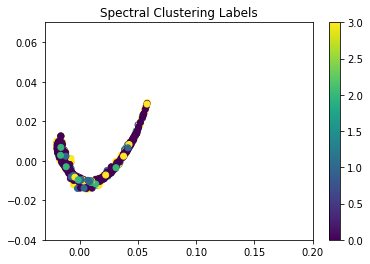

In [55]:
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_SC)
plt.title('Spectral Clustering Labels')
plt.xlim(-0.03, 0.2)
plt.ylim(-0.04, 0.07)
plt.colorbar()

/opt/anaconda3/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 122 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


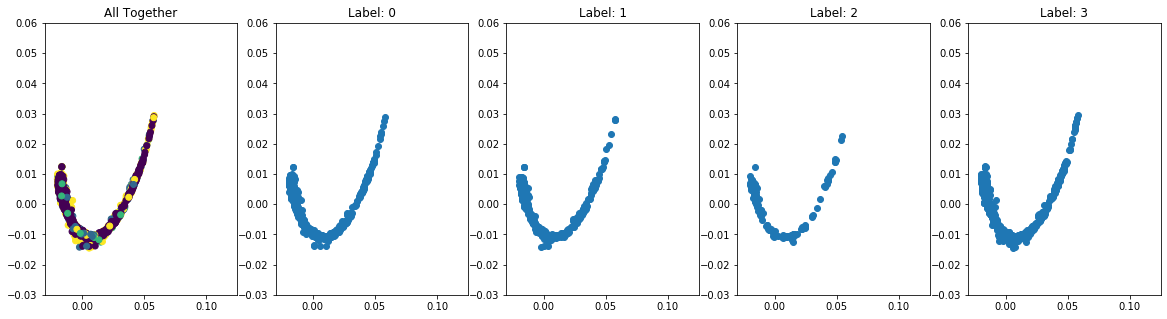

In [56]:
visualize_by_label(tmp, labels_SC, [-0.03, 0.125, -0.03, 0.06])

In [59]:
labels_SC += 5
labels_SC[labels_SC==5] = 2
labels_SC[labels_SC==6] = 1
labels_SC[labels_SC==7] = 3
labels_SC[labels_SC==8] = 0
np.mean(labels_SC == predictions)

0.3953862660944206

In [48]:
# this doesn't really do much, don't have to run
dif = data_matrix[:,0:5] - data_matrix[:,5:10]
data_matrix = np.append(data_matrix,dif,axis=1)
data_matrix

array([[-0.41106333, -0.59878791,  1.62736993, ...,  0.92409719,
         0.76441152, -0.65692399],
       [ 0.65751011, -1.31106998,  0.9792265 , ..., -0.29750804,
        -0.01224155, -1.34036088],
       [-1.53641673,  1.52634063,  0.2914785 , ..., -0.98622189,
        -1.48429119,  1.36530481],
       ...,
       [-0.75897398, -0.75311861,  0.62322433, ...,  1.16827532,
        -1.3738271 ,  3.13900903],
       [-0.90672513, -0.71576933,  0.78531569, ...,  1.16685412,
        -0.60740976,  0.20887408],
       [-0.7720008 , -0.83556996,  0.6438416 , ..., -0.41157869,
        -0.51112005,  0.7414508 ]])

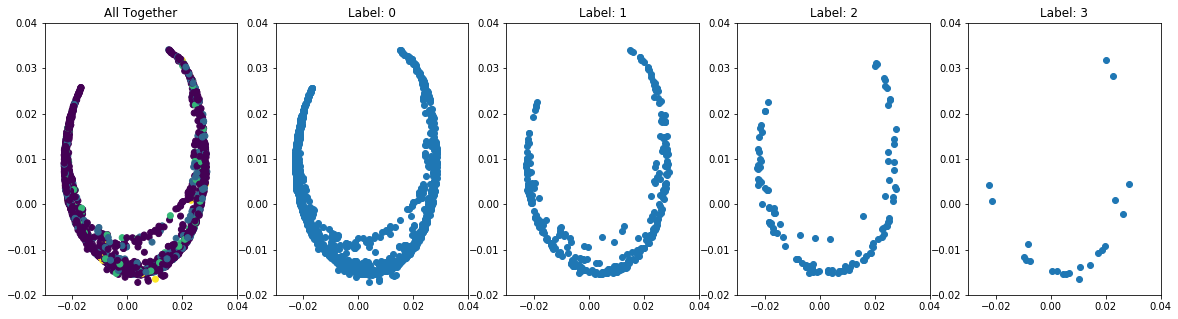

In [58]:
visualize_by_label(data_matrix, predictions, [-0.03,0.04,-0.02,0.04])

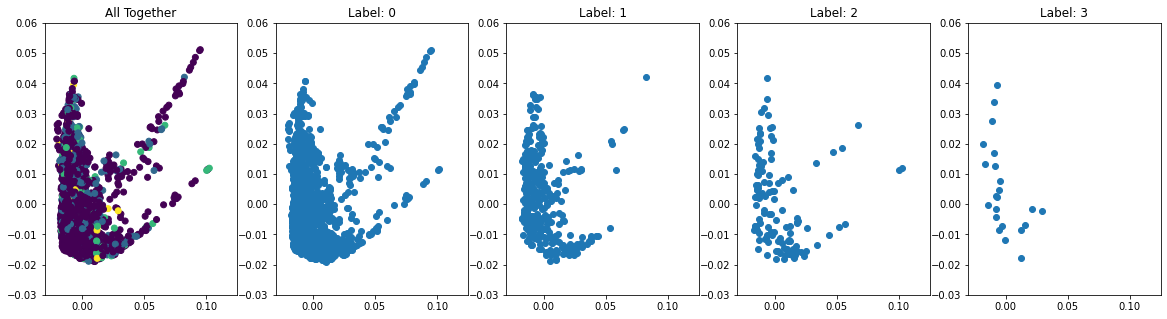

In [58]:
tmp = data_matrix - np.reshape(np.mean(data_matrix, axis=1), (data_matrix.shape[0], 1))
visualize_by_label(tmp, predictions, [-0.03, 0.125, -0.03, 0.06])

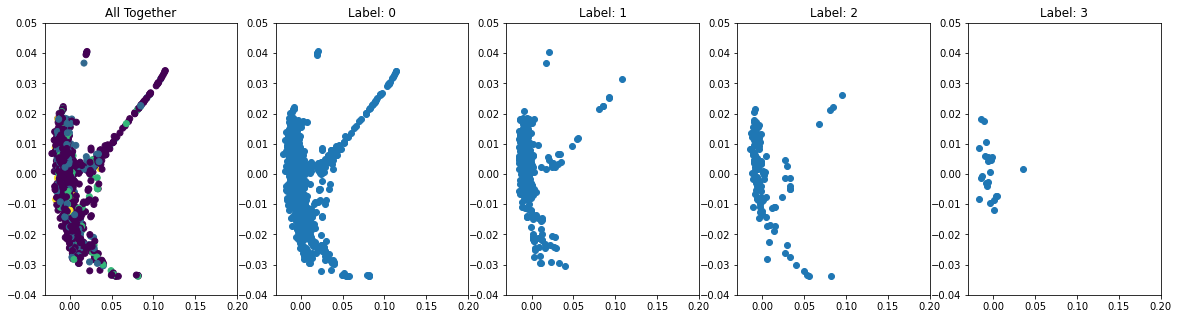

In [59]:
tmp = data_matrix ** 0.5
tmp = tmp - np.reshape(np.mean(tmp, axis=1), (tmp.shape[0], 1))
visualize_by_label(tmp, predictions, [-0.03, 0.2, -0.04, 0.05])

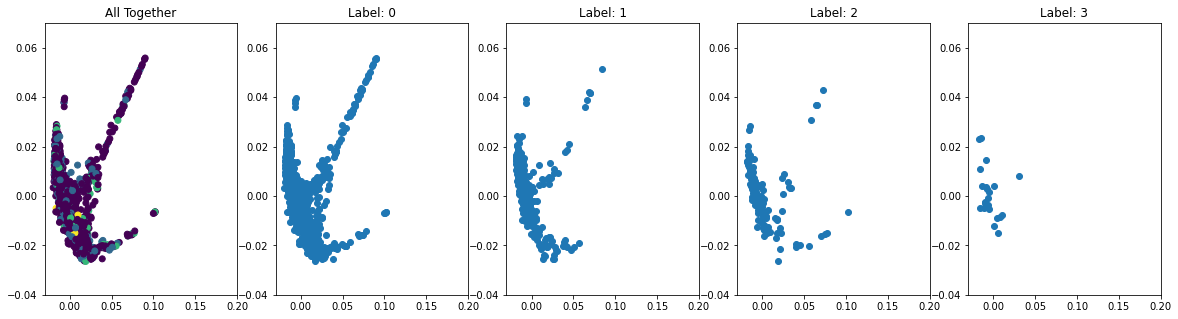

In [70]:
tmp = data_matrix ** 0.5
tmp = tmp - np.reshape(np.mean(tmp, axis=1), (tmp.shape[0], 1))
tmp = scipy.stats.zscore(tmp)
visualize_by_label(tmp, predictions, [-0.03, 0.2, -0.04, 0.07])

In [81]:
data_affin = cd.gaussian_kernel(tmp,kernel_type='adaptive',sigma=3.0,k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC  = cd.SC(data_lapl, k=4)
data_phate = phate.PHATE(verbose=0).fit_transform(tmp)

fixed bandwidth specified


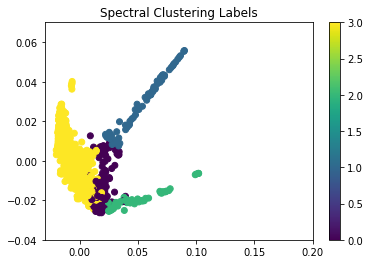

In [86]:
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_SC)
plt.title('Spectral Clustering Labels')
plt.xlim(-0.03, 0.2)
plt.ylim(-0.04, 0.07)
plt.colorbar()

We can do fancy parameter adjustments later when we have more data.

an interesting look :o 

### PCA

In [13]:
data_matrix -= np.mean(data_matrix,axis=0)
U, S, Vt = np.linalg.svd(data_matrix)
components = Vt.T

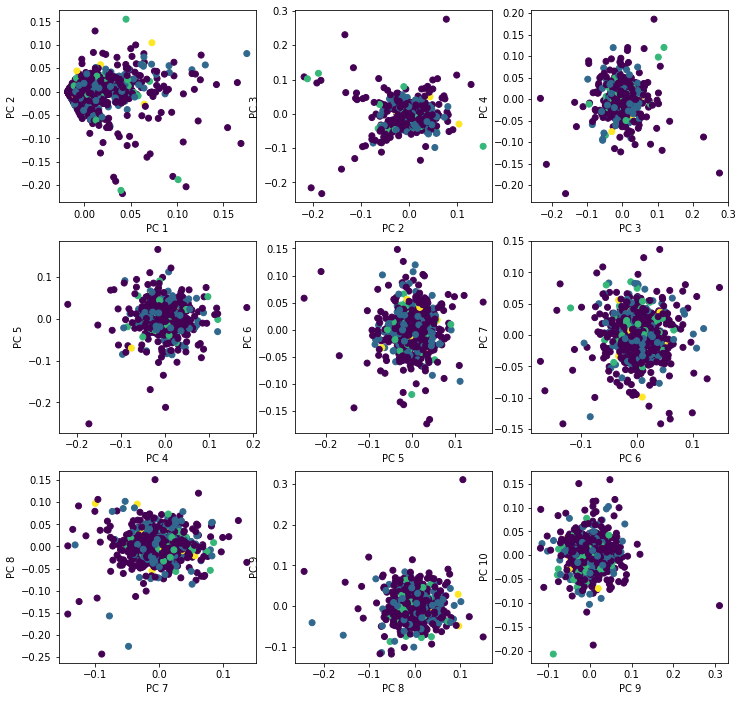

In [14]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.scatter(U[:,i],U[:,i+1],c=predictions)
    plt.xlabel('PC {}'.format(i+1)); plt.ylabel('PC {}'.format(i+2))
plt.show()

In [15]:
def get_top_PCs(components, chan_names, num_features=3, PC=1):
    components = np.abs(components[:,PC-1])
    top = np.flip(np.argsort(components)[-num_features:])
    labels = [chan_names[i] for i in top]
    return labels

In [16]:
print('PC 1 top channels:')
print(get_top_PCs(components, np.arange(1,10), PC=1)) # components are Vt.T (loadings)
print('PC 2 top channels:')
print(get_top_PCs(components, np.arange(1,10), PC=2))

PC 1 top channels:
[7, 1, 8]
PC 2 top channels:
[4, 5, 7]


None of these PCs look particularly amazing.. 

### KMeans

I guess 4 clusters: None, VS, MS, Both

In [17]:
from sklearn.cluster import KMeans
labels_kmeans = KMeans(n_clusters=4, n_init=5, max_iter=300).fit_predict(data_matrix)

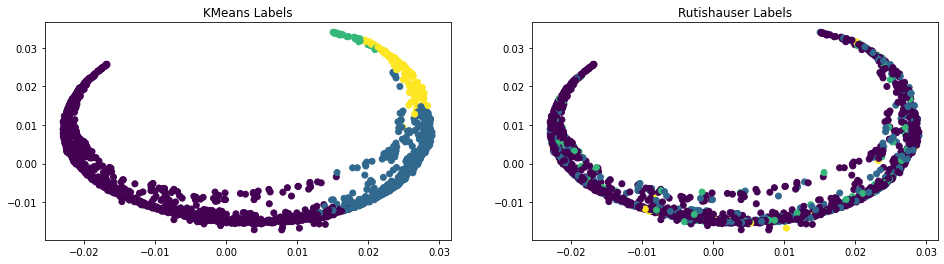

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_kmeans)
plt.title('KMeans Labels')
plt.subplot(122)
plt.scatter(data_phate[:,0],data_phate[:,1],c=predictions)
plt.title('Rutishauser Labels')
plt.show()

Hmm, well it would've been okay if there were more fewer "none" points ... maybe ....

### Spectral Clustering

In [80]:
import importlib
importlib.reload(cd)

<module 'clusterdata' from '/mnt/c/Users/Annie/Documents/Yale/CPSC553/neuron-clustering/clusterdata.py'>

In [20]:
data_affin = cd.gaussian_kernel(data_matrix,sigma=3.0,k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC  = cd.SC(data_lapl, k=4)

fixed bandwidth specified


/mnt/c/Users/Annie/Documents/Yale/CPSC553/neuron-clustering/clusterdata.py:258: RuntimeWarning: invalid value encountered in true_divide
  psi_norm = psi_k / np.linalg.norm(psi_k, axis=1)[:,np.newaxis]


ValueError: probabilities contain NaN

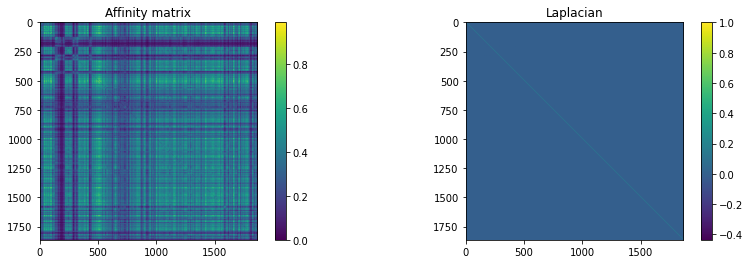

In [82]:
# visualize matrices
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(data_affin)
plt.title('Affinity matrix')
plt.colorbar()
plt.subplot(122)
plt.imshow(data_lapl)
plt.title('Laplacian')
plt.colorbar()
plt.show()

In [ ]:
# more visualize, i prolly should've done this better..
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_kmeans)
plt.title('KMeans Labels')
plt.subplot(132)
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_SC)
plt.title('Spectral Clustering Labels')
plt.subplot(133)
plt.scatter(data_phate[:,0],data_phate[:,1],c=predictions)
plt.title('Rutishauser Labels')
plt.show()

# Random Exploration
Feel free to ignore or to further play with the data here.

In [20]:
# import RutishauserLabtoNWB as RLab

dataDirectory = 'NWBData'
list_of_patients_behavior = [5, 6]  # List of sessions to summarize behavior. Set to [] to skip
list_of_patients_neurons = [132]    # List of sessions to analyze neural data for. Set to [] to skip

# RLab.NO2NWB_analysis(NWBFilePath,list_of_patients_behavior, list_of_patients_neurons)

Session_id:  CS58_132
Channel:  146
Cell_id:  0
Number of spikes: 1037
Session_id:  CS58_132
Channel:  148
Cell_id:  1
Number of spikes: 1365
Session_id:  CS58_132
Channel:  149
Cell_id:  2
Number of spikes: 2324
Session_id:  CS58_132
Channel:  150
Cell_id:  3
Number of spikes: 3589
Session_id:  CS58_132
Channel:  177
Cell_id:  4
Number of spikes: 722
Session_id:  CS58_132
Channel:  181
Cell_id:  5
Number of spikes: 5699
Session_id:  CS58_132
Channel:  182
Cell_id:  6
Number of spikes: 937
Session_id:  CS58_132
Channel:  183
Cell_id:  7
Number of spikes: 749
Processing..:  CS58_132  146   614
Processing..:  CS58_132  148   776
Processing..:  CS58_132  149   821
Processing..:  CS58_132  150   1093
Processing..:  CS58_132  177   551
Processing..:  CS58_132  181   1422
Processing..:  CS58_132  182   527
Processing..:  CS58_132  183   529
There are 5 VS cell(s) in this session(132): NWBData/P58CS_NOID132.nwb
There are 0 MS cell(s) in this session(132): NWBData/P58CS_NOID132.nwb


/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


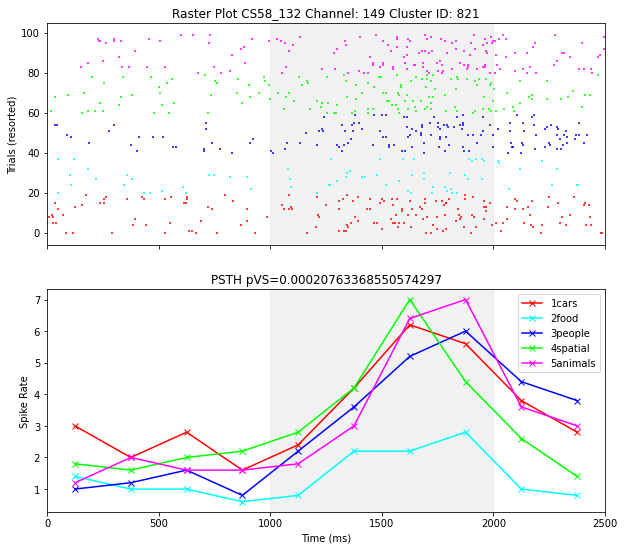

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


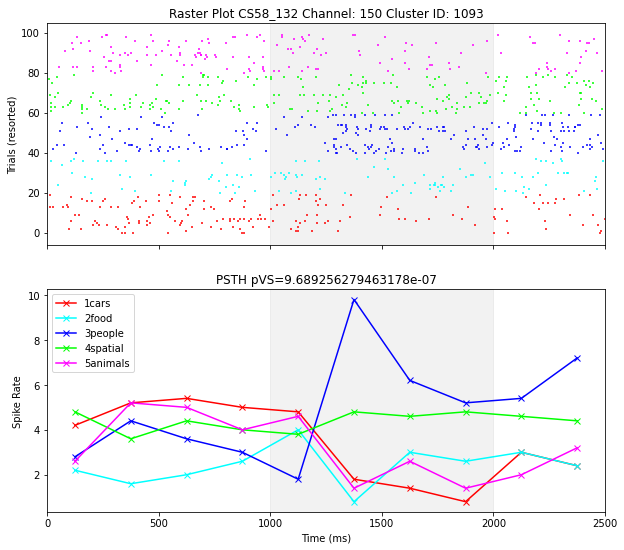

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


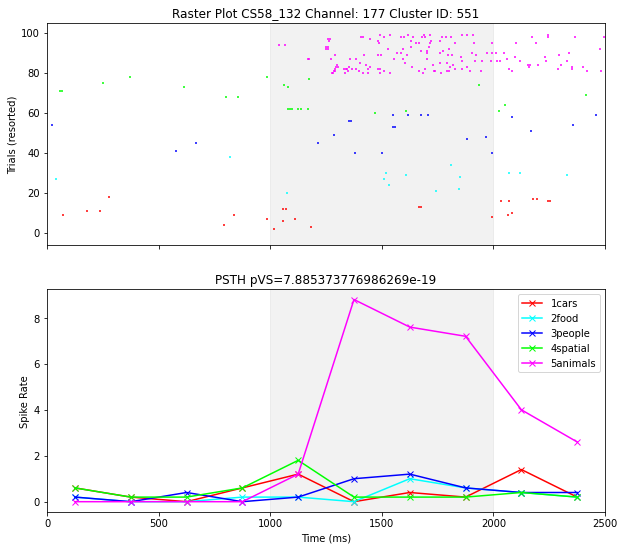

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


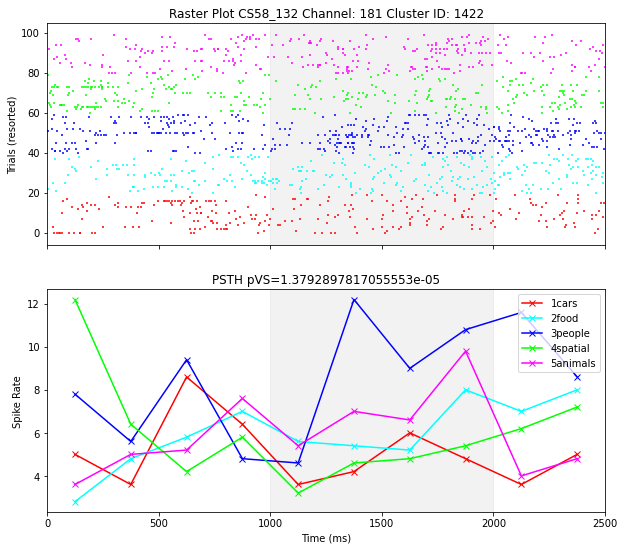

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


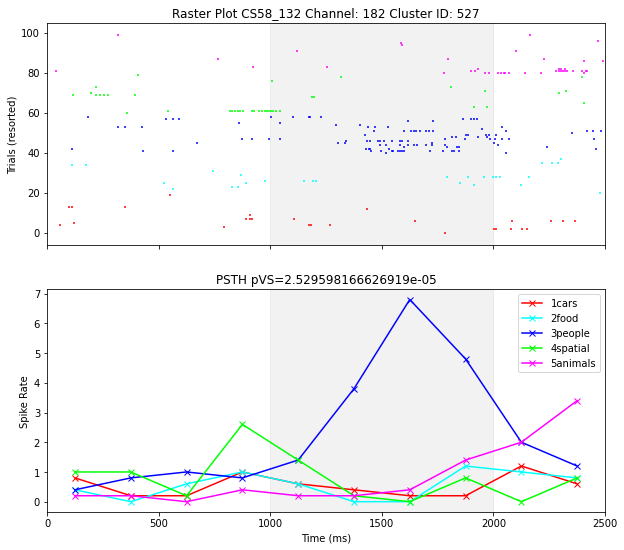

In [25]:
for session in list_of_patients_neurons:
        session_file = helper.getpatientfile_fromINIfile(session, dataDirectory) # Session file = .nwb file

        neurons = []
        # Get neurons from nwbfile
        try:
            nwbfile = helper.read(session_file)
        except ValueError as e:
            print('Problem opening the file: ' + str(e))
            # logging.warning('Error opening file: ' + session_file)
            continue
        try:
            temp = single_neuron.extract_neuron_data_from_nwb(nwbfile)
        except IndexError as e:
            print("Somehow catch this index error: " + str(e))
            continue
        neurons = neurons + temp

        # Find visually selective (VS) neurons and memory selective (MS) neurons
        vs_neurons = []
        ms_neurons = []

        for neuron in neurons:
            print('Processing..: ', str(neuron.session_id) + ' ', str(neuron.channel_id),' ', str(neuron.neuron_id))
            if neuron.vs_test() < 0.05:
                vs_neurons.append(neuron)
            if neuron.ms_test(1000) < 0.05:
                ms_neurons.append(neuron)

        # Get some Data about VS & MS cells
        print('There are {} VS cell(s) in this session({}): {}'.format(len(vs_neurons), session ,session_file))
        print('There are {} MS cell(s) in this session({}): {}'.format(len(ms_neurons), session ,session_file))


        # Plot the raster/psth for ALL VS neurons and MS neurons in the identified session
        for i in range(0, len(vs_neurons)):
            vs_neurons[i].raster_psth(cell_type='visual')

        for i in range(0, len(ms_neurons)):
            ms_neurons[i].raster_psth(cell_type='memory')

In [3]:
file = NWBHDF5IO('NWBData/P9HMH_NOID5.nwb', mode='r').read()

In [12]:
def get_event_data(nwbfile):
    """
    Get event data from the nwbfile
    """
    events = nwbfile.get_acquisition('events')
    experiment_id_list = np.asarray(nwbfile.get_acquisition('experiment_ids').data)
    events_data = np.asarray(events.data)
    events_timestamps = np.asarray(events.timestamps)

    experiment_description = nwbfile.data_collection

    experiment_ids = re.findall(r'\d+', experiment_description)
    experiment_id_learn = int(experiment_ids[0])
    experiment_id_recog = int(experiment_ids[1])

    ind_learn = np.where(experiment_id_list == experiment_id_learn)
    ind_recog = np.where(experiment_id_list == experiment_id_recog)

    events_learn = events_data[ind_learn].astype(float)
    timestamps_learn = events_timestamps[ind_learn]

    events_recog = events_data[ind_recog].astype(float)
    timestamps_recog = events_timestamps[ind_recog]

    return events_learn, timestamps_learn, events_recog, timestamps_recog

In [17]:
events_learn, timestamps_learn, events_recog, timestamps_recog = get_event_data(file)